<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

# Linear Regression

In [2]:
import numpy as np

## 선형 회귀 분석 데이터셋 만들기

* 표준정규분포를 따르는 x_0, x_1을 200개 생성
beta_0 = 1, beta_1 = -0.1, beta_2 = 0.8 이고
노이즈의 분산을 0.4로 하여 y를 생성

In [14]:
n = 200 # 데이터 생성 수
np.random.seed(42) # 매번 동일한 난수 생성하기 위해 랜덤 Seed를 42로 지정
x_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x_1 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
beta_0, beta_1, beta_2, eps = 1, -0.3, 0.8, 0.4
y = beta_0 + beta_1 * x_0 + beta_2 * x_1
np.mean(x_0), np.var(x_0), np.mean(x_1), np.var(x_1) # 각각 평균과 분산을 뽑아 확인

(-0.04077096517208498,
 0.8624344486801115,
 0.0858681868988765,
 0.9693056403571758)

* x_0는 평균 10, 분산 4가 되도록 변환 
* x_1은 평균 -40, 분산이 16이 되도록 변환

In [15]:
x_0 = x_0 * 2 + 10 # 표준편차 2를 곱하고 여기에 평균 10을 더한다
x_1 = x_1 * 4 - 40 # 표준편차 4를 곱하고 여기에 평균 -40을 더한다
np.mean(x_0), np.var(x_0), np.mean(x_1), np.var(x_1) # 각각 평균과 분산을 뽑아 확인

(9.91845806965583, 3.449737794720446, -39.656527252404494, 15.508890245714811)

x_0, x_1으로 Matrix X를 만든다.

In [10]:
X = np.vstack([x_0, x_1]).T

* 각각의 속성값과 (x_0, x_1)과 y값의 산포도 그래프를 찍는다.

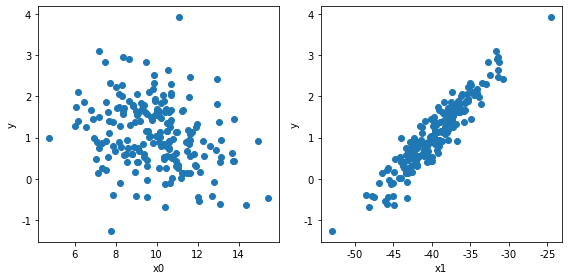

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import make_regression

[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) 회귀 분석 데이터셋을 만든다. 

n_samples=100, n_features=5, n_informative=3, random_state=9, coef=True 로 해서 데이터셋 생성하여 입력 값은 X에 출력은 y 값, 계수는 coef에 설정.

In [ ]:
X, y, coef = make_regression(n_samples=100, n_features=5, n_informative=3, random_state=9, coef=True)
X.shape, y.shape, coef

((100, 5),
 (100,),
 array([ 6.74479784, 71.20447834,  0.        ,  0.        , 50.7033102 ]))

각각의 속성과, y를 산포도 그래프로 시각화

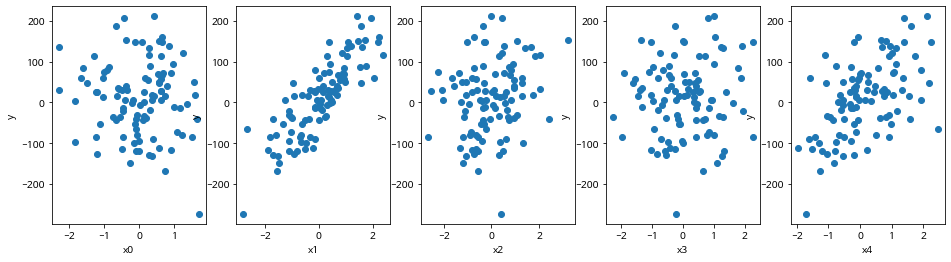

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.show()